# Problem Statement

In this project, the goal is to develop a regression model to accurately predict the insurance costs for individual customers based on their demographic and lifestyle attributes. The dataset includes critical factors such as age, BMI, number of children, smoking status, gender, and geographic region, which all contribute to the overall cost of insurance. By building this predictive model, the insurance company can assess risk more accurately, personalize premium pricing, and optimize its pricing strategy, ensuring both competitiveness in the market and profitability. The model will also help identify the key factors that significantly influence insurance costs, enabling targeted customer engagement and risk mitigation strategies.

<center><img src="https://www.canarahsbclife.com/content/dam/choice/blog-inner/images/what-is-insurance-meaning-and-benefits-of-insurance.jpg" width=500/></center>

**Content**  
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.



**Dataset Description:**  
- `age`: Age of the customer (numerical value)

- `sex`: Sex of the customer (Male/Female)

- `bmi`: Bmi ratio of the customer (numberical value)

- `children`: Number of childern (numerical value)

- `smoker`: Is the customer smokes or not (Yes/No)

- `Region`: where did customer located (southeast, southwest, northeast, northwest)
- `expenses`: total medical expenses charged to the individual policyholder


# STEP 1: Import Necessary Libraries & Modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import os

# STEP 2: Read Dataset from Google Drive

In [ ]:
# Load the data

# Mount the drive
from google.colab import drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the Excel file, skipping the first row and using the second row as the header
data = pd.read_csv("/content/drive/MyDrive/datasets/insurance.csv")


In [ ]:
# View the data
data.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


# STEP 3: EDA

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to uncover patterns, detect anomalies, test hypotheses, and check assumptions. It helps in understanding the underlying structure of the data before applying modeling techniques.

## 3.1 Check the distribution of `bmi` and list down your observtions


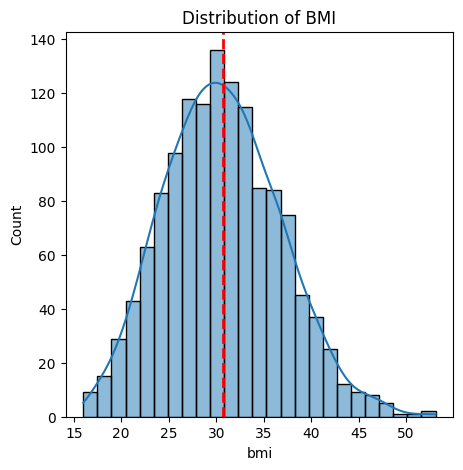

In [ ]:
# Create a bmi histogram to see the disribution of bmi

plt.figure(figsize = (5,5))
plt.title('Distribution of BMI')
# Use histplot from sns library
sns.histplot(data = data,
             x = 'bmi',
             kde = True);
plt.axvline(x = data['bmi'].mean(),linestyle = '--',lw = 2,c = 'r');

### Interpretation:
- The BMI data appears to be approximately normally distributed, centered around the mean value.
- The mean BMI (indicated by the red dashed line) is around 30, which suggests that the average customer has a BMI in the overweight category.
- The distribution shows a moderate spread, with most BMIs falling between 20 and 40, indicating a wide range of body mass indices among customers.
- There is a slight right skew, with fewer customers having very high BMIs above 40, potentially indicating a small number of outliers in the data.

## 3.2 Find the distribution of all the categorical variables and list down your observations.

*Hint: Use pie chart for this visualization*

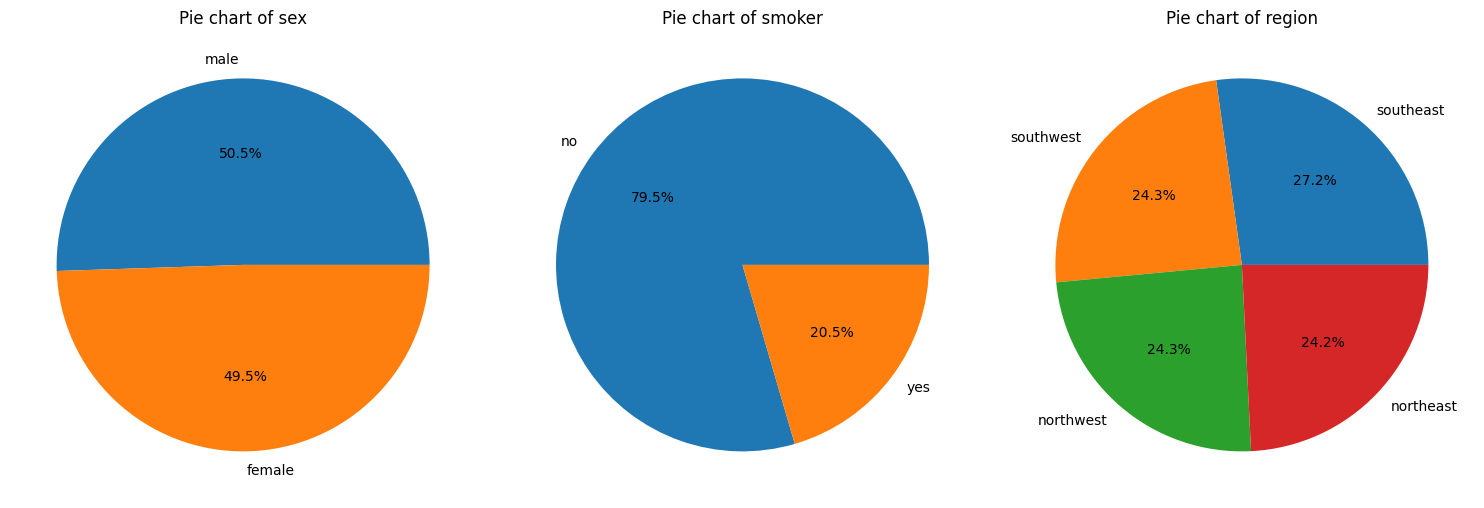

In [ ]:
# Visualize the distribution of categorical variables

# Create a list of the categorical columns
cat_cols = [i for i in data.columns if data[i].dtype == 'O']

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Generate pie charts for the categorical columns
for i, col in enumerate(cat_cols):
    if i < 3:  # Ensure only 3 subplots are created
        axes[i].set_title(f'Pie chart of {col}')
        axes[i].pie(data[col].value_counts(),
                    labels=data[col].value_counts().index,
                    autopct='%1.1f%%')

# Adjust the layout to avoid overlap
plt.tight_layout()
plt.show()


### Interpretation:
- The dataset has an almost equal representation of male (50.5%) and female (49.5%) customers, indicating no significant gender imbalance.
- A large majority of customers (79.5%) are non-smokers, while 20.5% are smokers, which may be a significant factor in determining insurance costs.
- The customers are fairly evenly distributed across the four regions, with the Southeast having a slightly higher representation (27.2%) compared to other regions.

We will focus on variable smoker and see how other variable are related with smoker variable.

## 3.3 Check the relationship between the variables `smoker`, `age`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

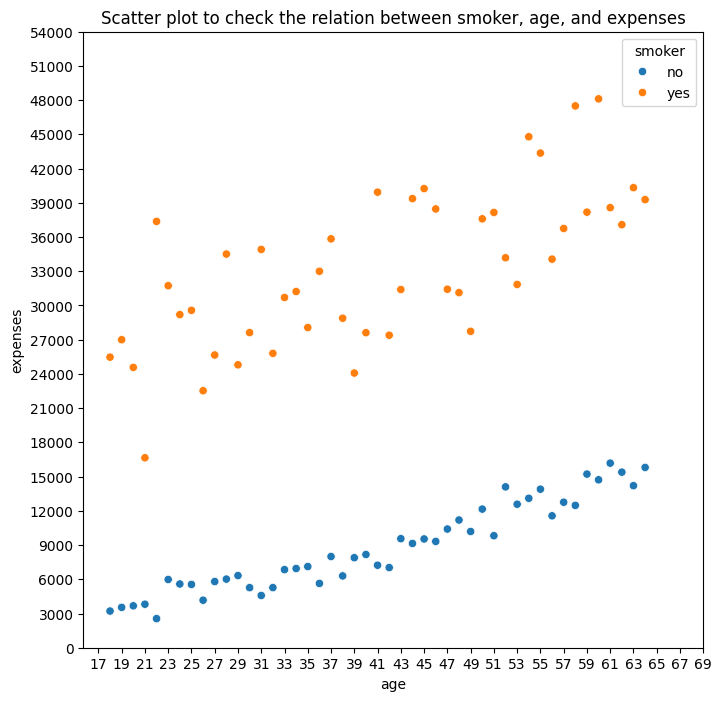

In [ ]:
# Checking the relationship between smoker, age, and expenses

# Grouping data by 'smoker' and 'age' to calculate the mean expenses for each group
a1 = data.groupby(['smoker', 'age'])['expenses'].mean().reset_index()

# Setting up the plot
plt.figure(figsize=(8,8))  # Define the size of the plot
plt.title('Scatter plot to check the relation between smoker, age, and expenses')

# Creating a scatter plot with 'age' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
sns.scatterplot(data=a1,
                x='age',
                y='expenses',
                hue='smoker')

# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(np.arange(0, 55000, 3000))

# Customizing the x-axis ticks to range from age 17 to 70 with increments of 2 years
plt.xticks(np.arange(17, 70, 2))

# Display the plot
plt.show()


### Interpretation:
- Smokers consistently incur higher medical expenses across all age groups compared to non-smokers, indicating a strong correlation between smoking and increased healthcare costs.
- For both smokers and non-smokers, medical expenses tend to increase with age, suggesting that older individuals generally have higher healthcare costs.
- The clear separation between the two groups (smokers and non-smokers) highlights the significant financial impact of smoking on healthcare expenses.

## 3.3 Check the relationship between the variables `smoker`, `bmi`, `expenses`

*Hint: Use scatter plot to find the relationship between the variables.*

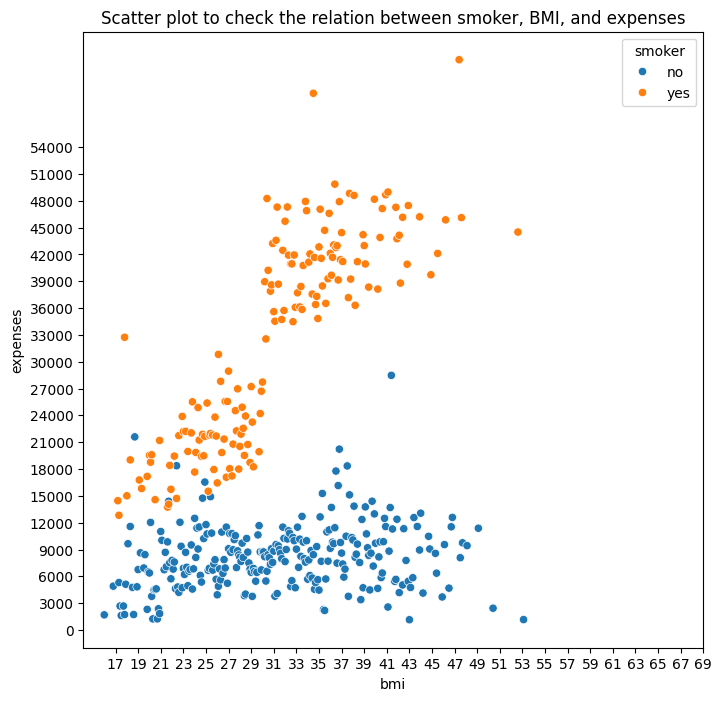

In [ ]:
# Checking the relationship between smoker, BMI, and expenses

# Grouping the data by 'smoker' and 'bmi' to calculate the mean expenses for each group
a1 = data.groupby(['smoker', 'bmi'])['expenses'].mean().reset_index()

# Setting up the plot
plt.figure(figsize=(8,8))  # Define the size of the plot
plt.title('Scatter plot to check the relation between smoker, BMI, and expenses')

# Creating a scatter plot with 'bmi' on the x-axis, 'expenses' on the y-axis, and different colors for 'smoker' status
sns.scatterplot(data=a1,
                x='bmi',
                y='expenses',
                hue='smoker')

# Customizing the y-axis ticks to range from 0 to 55,000 with increments of 3,000
plt.yticks(np.arange(0, 55000, 3000))

# Customizing the x-axis ticks to range from BMI 17 to 70 with increments of 2 units
plt.xticks(np.arange(17, 70, 2))

# Display the plot
plt.show()


### Interpretation:
- Smokers (orange points) incur significantly higher medical expenses across all BMI ranges compared to non-smokers (blue points), indicating that smoking is a major factor in increasing healthcare costs.
- For both smokers and non-smokers, there is a visible trend where medical expenses increase with higher BMI, but the increase is much more pronounced for smokers.
- The clear separation between smokers and non-smokers highlights the substantial financial impact of smoking, with smokers showing consistently higher expenses even at lower BMI levels.
- Non-smokers tend to cluster around lower expense ranges regardless of their BMI, while smokers show a broader and higher spread of expenses, especially in the mid-to-high BMI range.

## 3.4 Find the outliers (if any) in the numerical variables

*Hint: Use box plot and calculate IQR to detect the outliers.*

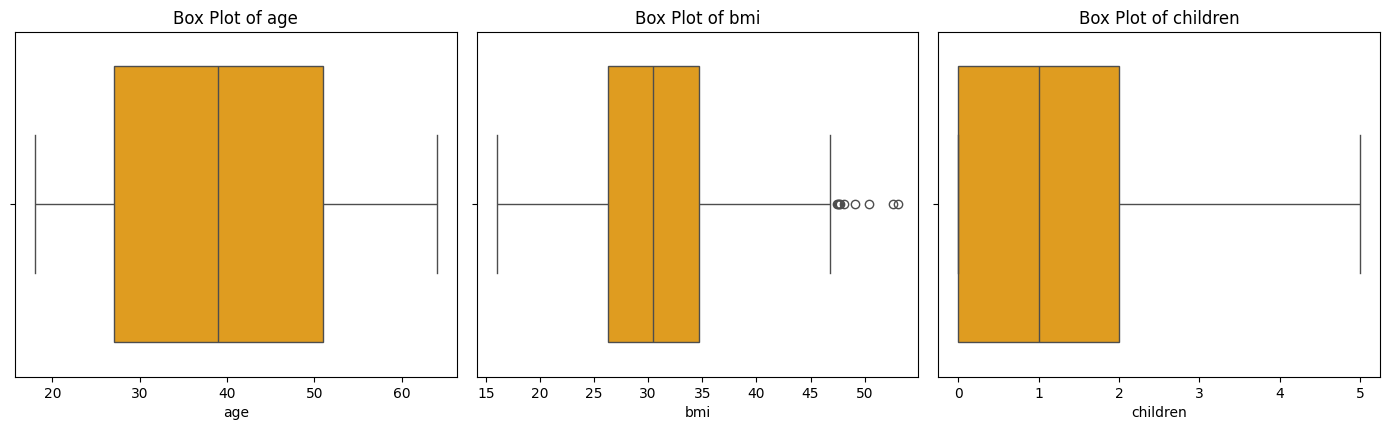


Outliers in age:
Series([], Name: age, dtype: int64)

Outliers in bmi:
116     49.1
286     48.1
401     47.5
543     47.4
847     50.4
860     47.6
1047    52.6
1088    47.7
1317    53.1
Name: bmi, dtype: float64

Outliers in children:
Series([], Name: children, dtype: int64)


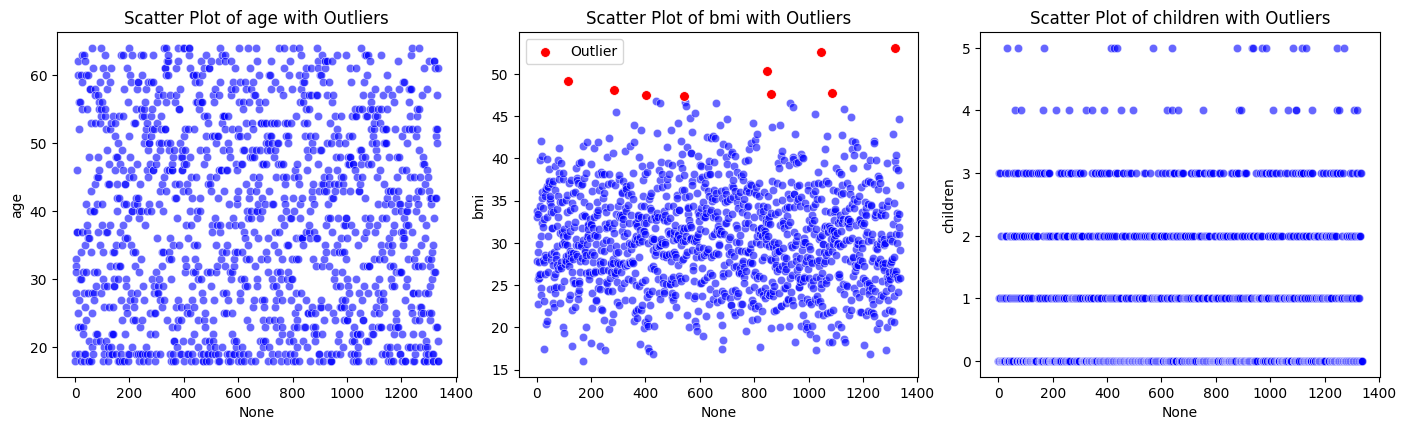

In [ ]:
# Identify numerical columns for outlier detection
numerical_features = data.select_dtypes(include=[np.number]).columns.tolist()
numerical_features.remove('expenses')  # Remove 'expenses' as we are focusing on other features

# Visualizing Outliers Using Box Plots
plt.figure(figsize=(14, 8))  # Set up the plot size
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
    sns.boxplot(x=data[column], color='orange')  # Plot a boxplot for each numerical feature
    plt.title(f'Box Plot of {column}')  # Set the title for each subplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the boxplots

# Identifying Outliers Using the IQR Method
outliers = {}  # Initialize a dictionary to store outliers
for column in numerical_features:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile) for the column
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1  # Compute the Interquartile Range (IQR)

    # Define the lower and upper bounds to detect outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers that fall outside the lower and upper bounds
    outliers[column] = data[(data[column] < lower_bound) | (data[column] > upper_bound)][column]

    # Print the detected outliers for each numerical feature
    print(f"\nOutliers in {column}:")
    print(outliers[column])

# Visualizing Outliers with Scatter Plots
plt.figure(figsize=(14, 8))  # Set up the plot size
for i, column in enumerate(numerical_features, 1):
    plt.subplot(2, 3, i)  # Create subplots in a 2x3 grid
    sns.scatterplot(x=data.index, y=data[column], color='blue', alpha=0.6)  # Plot the data points
    # Highlight outliers in red with larger markers
    sns.scatterplot(x=outliers[column].index, y=outliers[column], color='red', marker='o', s=50, label='Outlier')
    plt.title(f'Scatter Plot of {column} with Outliers')  # Set the title for each subplot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()  # Display the scatter plots with highlighted outliers


### Interpretation from The Outlier Analysis

The dataset contains 9 outlier samples in the BMI column. To analyze these outliers, we performed the following steps:

1. We used a box plot to visualize and identify the presence of outliers in the all the columns and we can see there are few outliers in bmi column
2. We applied the IQR method to extract the outlier values from the dataset.


## 3.5 Do a complete correlation analysis of the entire data

*Hint: Create dummy variables for all the categorical variables and then use a heatmap to do the correlation analysis.*

Correlation with 'expenses':
age                 0.299008
bmi                 0.198576
children            0.067998
expenses            1.000000
sex_male            0.057292
smoker_yes          0.787251
region_northwest   -0.039905
region_southeast    0.073982
region_southwest   -0.043210
Name: expenses, dtype: float64


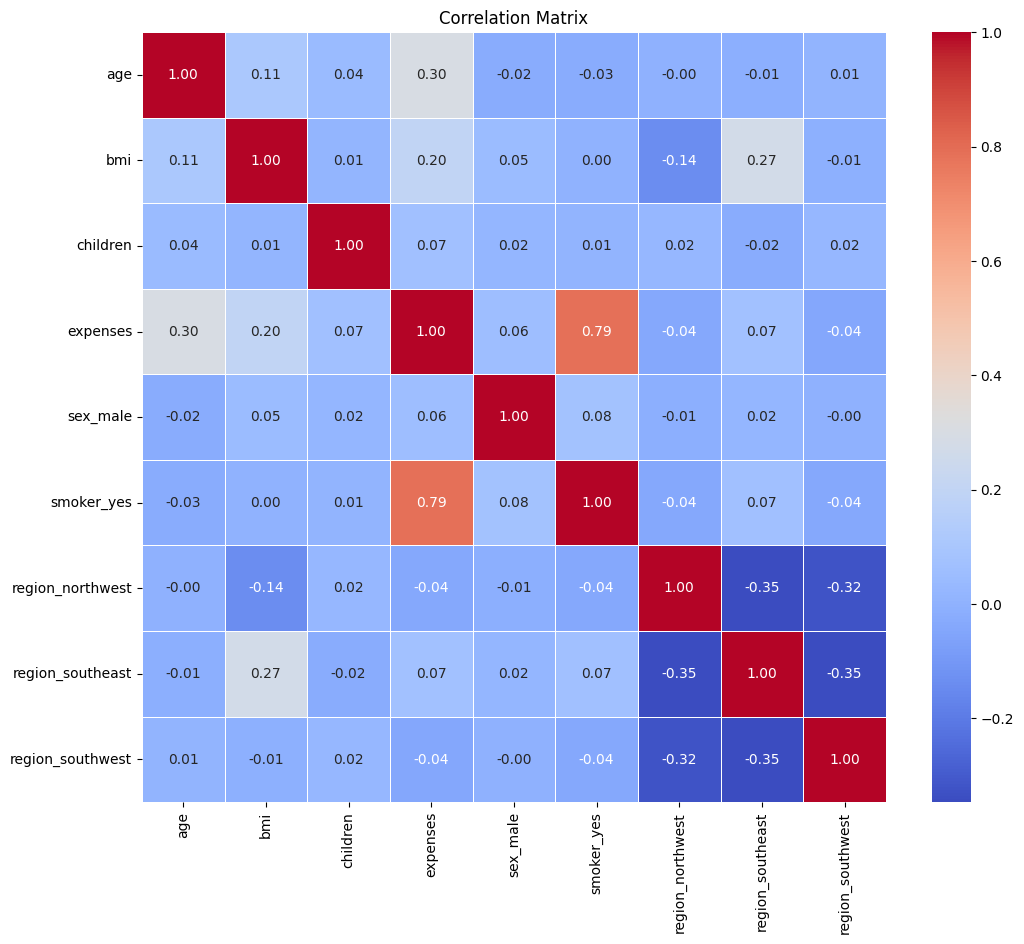

In [ ]:
# Identify categorical and numerical columns
categorical_features = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding directly to the entire dataset
data_encoded = pd.get_dummies(data, columns=categorical_features, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Print the correlation with the 'expenses' variable
print("Correlation with 'expenses':")
print(correlation_matrix['expenses'])

# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


### Interpretation:
- There is a strong positive correlation (0.79) between `smoker_yes` and `expenses`, indicating that smoking is a significant factor in increasing medical expenses.
- `age` has a moderate positive correlation (0.30) with `expenses`, suggesting that older individuals tend to have higher medical expenses.
- The regions (`region_northwest`, `region_southeast`, `region_southwest`) have low correlations with `expenses`, but they are negatively correlated with each other, indicating distinct geographic patterns.

# STEP 4: Data Preprocessing

Data preprocessing is the crucial step of cleaning and transforming raw data into a suitable format for analysis or modeling, ensuring that the data is accurate, complete, and ready for machine learning algorithms. It helps improve model performance and accuracy by addressing issues like missing values, noise, and inconsistencies.

## 4.1 Check for any missing values & handle them if necessary

In [ ]:
# Check the dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Interpretation:

- There are NO NULL values in the dataset.

# STEP 5: Model Building

## 5.1 Split the data into Training & Test data

*Hint: Use the dummy encoded data.*

In [ ]:
# Separate the target & feature variables
X = data_encoded.drop('expenses', axis=1)
y = data_encoded['expenses']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5.2 Scale the dataset

In [ ]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_test[:5]

array([[ 0.40114007, -0.88770823,  0.73433626, -1.0246016 , -0.50874702,
        -0.56079971, -0.59966106, -0.5723141 ],
       [-0.23863782, -0.09306431, -0.91119211, -1.0246016 , -0.50874702,
         1.78316783, -0.59966106, -0.5723141 ],
       [ 1.75178229, -0.60627185, -0.91119211, -1.0246016 ,  1.96561348,
         1.78316783, -0.59966106, -0.5723141 ],
       [ 0.47222651, -0.80493283,  1.55710045,  0.97598911, -0.50874702,
         1.78316783, -0.59966106, -0.5723141 ],
       [-1.44710717,  0.22148224, -0.91119211,  0.97598911,  1.96561348,
         1.78316783, -0.59966106, -0.5723141 ]])

## 5.3 Fit the Linear Regression Model

In [ ]:
# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

print(y_pred)

[ 8976.76760964  7061.47078348 36861.00837958  9439.16742899
 26965.82783567 10866.56613365   163.68342867 16902.1625389
  1092.78891435 11221.84972563 28100.81510083  9381.37647426
  5265.11298425 38433.51445836 40248.06655201 37084.37888675
 15248.12984097 35901.53286407  9127.45708271 31464.93323459
  3848.37001706 10130.91497172  2370.69195712  7139.66129952
 11294.96254187 12967.62453886 14509.58195129  6160.69986604
  9962.85959031  2163.07205222  9116.85372521 13064.63457975
  4571.36274084  3423.94442545  4460.1164586  13031.12862237
  1979.67910034  8813.16035987 33258.81811961 32584.31750912
  3910.32992482  4343.38905053 14143.48952085 11435.21647816
  8791.14158849 12096.4844327   5272.59144805  3150.51559564
 35504.10915377  9154.13549953 15835.69309292  2352.62339682
 12359.83078765  1472.69854255 13377.66583865 12570.20082856
  4353.80717022 32169.40215637 13321.12708687 12913.03146333
 14167.45396849 10500.87520372 16362.21376975  7768.13192586
 11846.62396902  4048.651

## 5.4 Check the Coefficients


In [ ]:
# Print the best fit regression line
print("The best fit line is:",lr_model.coef_[0],"X+",lr_model.intercept_)

The best fit line is: 3614.6976326253143 X+ 13346.089869158879


## 5.5 Evaluate the model - Find MAE, MSE, R-squared

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Linear Regression Model Evaluation:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")


Linear Regression Model Evaluation:
Mean Absolute Error (MAE): 4181.561524000794
Mean Squared Error (MSE): 33600065.35507784
R-squared (R2): 0.7835726930039905


### Interpretation:
- The model explains approximately 78.36% of the variance in the target variable, indicating a good fit but with room for improvement.

## 5.6 Calculate Adjusted R-squared value using the formula

Here's the Adjusted R-squared formula formatted for Google Colab markdown:

```
Adjusted R-squared (R²ᴀᴅᴊ) = 1 - [(1 - R²) * (n - 1)] / (n - k - 1)
```

### Where:
- **R²** is the R-squared value of the model.
- **n** is the total number of observations.
- **k** is the number of independent variables (predictors) in the model.



In [ ]:
# Calculate the number of observations (n) and the number of predictors (p)
n = X_test.shape[0]  # Number of observations in the test set
p = X_test.shape[1]  # Number of predictors (features) in the test set

# Calculate the Adjusted R-squared value
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print the Adjusted R-squared value
print(f'Adjusted R-squared (R²): {adjusted_r2}')


Adjusted R-squared (R²): 0.7768876796604843


## 5.7 Visualize the predictions

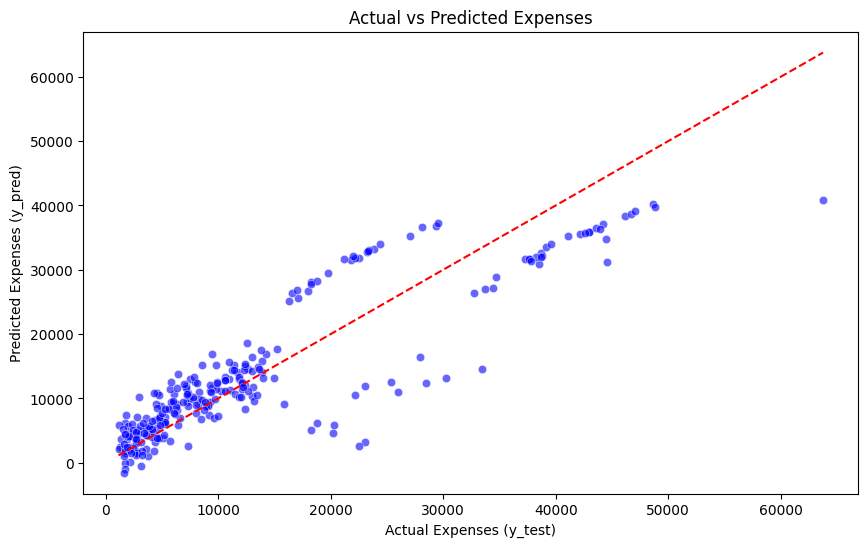

In [ ]:
# Visualizing the predictions

plt.figure(figsize=(10, 6))  # Set the figure size for the plot

# Create a scatter plot of actual vs. predicted expenses
sns.scatterplot(x=y_test, y=y_pred, color='blue', alpha=0.6)  # Blue dots represent predicted values vs. actual values

# Add a line plot representing the ideal case where predicted values equal actual values
sns.lineplot(x=y_test, y=y_test, color='red', linestyle='--')  # Red dashed line represents perfect predictions (y_pred = y_test)

# Add titles and labels to the plot
plt.title('Actual vs Predicted Expenses')  # Title of the plot
plt.xlabel('Actual Expenses (y_test)')  # Label for the x-axis
plt.ylabel('Predicted Expenses (y_pred)')  # Label for the y-axis

# Display the plot
plt.show()  # Render the plot


### Interpretaion:

- Many of the blue data points are close to the red dashed line, indicating that the model's predictions are fairly accurate for those cases.
- he model tends to underestimate expenses for higher actual values, as evidenced by the points above the red line in the higher range.